In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

In [326]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

In [327]:
np.random.seed()
n = 100
degree = 5
# Make data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

In [328]:
X = np.column_stack([x ** i for i in range(6)]) 

In [329]:
# Split data set in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [330]:
X_train_mean = np.mean(X_train,axis=0)
#Center by removing mean from each feature
X_train_scaled = X_train - X_train_mean 
X_test_scaled = X_test - X_train_mean

#Remove the intercept from the training data.
y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler
y_test_scaled = y_test - y_scaler

OLS

In [331]:
model = make_pipeline(PolynomialFeatures(degree = degree), LinearRegression(fit_intercept = False))
clf = model.fit(X_train_scaled, y_train_scaled)
y_fit = clf.predict(X_train_scaled)
y_pred = clf.predict(X_test_scaled)
test_mse = MSE(y_test_scaled, y_pred)
train_mse = MSE(y_train_scaled, y_fit)

print("Training MSE for OLS:")
print(train_mse)
print("Test MSE for OLS:")
print(test_mse)

Training MSE for OLS:
0.005155789943590989
Test MSE for OLS:
0.0140720333006597


Ridge regression

In [332]:
I = np.eye(6,6)
lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
MSEtraining = np.zeros(len(lambdas))
MSEtest = np.zeros(len(lambdas))
for i in range(len(lambdas)):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X_train_scaled.T @ X_train_scaled + lmb*I) @ X_train_scaled.T @ y_train_scaled
    intercept_ = y_scaler - X_train_mean @ Ridgebeta
    # Make the prediction
    ytildeRidge = X_train_scaled @ Ridgebeta + y_scaler
    ypredictRidge = X_test_scaled @ Ridgebeta + y_scaler
    MSEtraining[i] = MSE(y_train, ytildeRidge)
    MSEtest[i] = MSE(y_test, ypredictRidge)

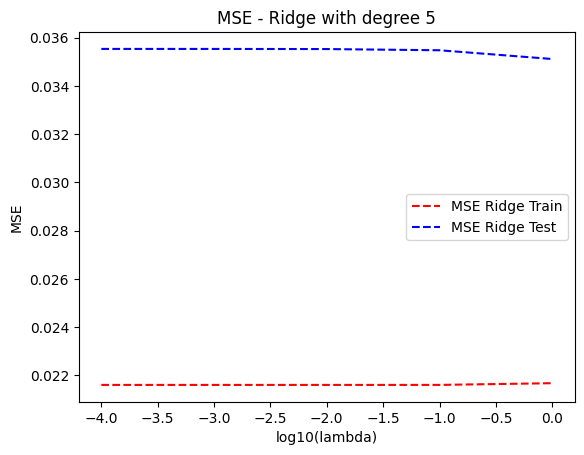

In [333]:
plt.figure()
plt.title("MSE - Ridge with degree 5")
plt.plot(np.log10(lambdas), MSEtraining, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(lambdas), MSEtest, 'b--', label = 'MSE Ridge Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

Repeat with degree 10.

In [334]:
def create_design_matrix(degree):
    return np.column_stack([x ** i for i in range(degree+1)])

In [335]:
X = create_design_matrix(10)

In [336]:
# Split data set in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Scale the data
X_train_mean = np.mean(X_train,axis=0)

X_train_scaled = X_train - X_train_mean 
X_test_scaled = X_test - X_train_mean

y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler   

In [337]:
degree = 10

model = make_pipeline(PolynomialFeatures(degree = degree), LinearRegression(fit_intercept = False))
clf = model.fit(X_train_scaled, y_train_scaled)
y_fit = clf.predict(X_train_scaled)
y_pred = clf.predict(X_test_scaled)
test_mse = MSE(y_test_scaled, y_pred)
train_mse = MSE(y_train_scaled, y_fit)

print("Training MSE for OLS:")
print(train_mse)
print("Test MSE for OLS:")
print(test_mse)

Training MSE for OLS:
0.060974963394626915
Test MSE for OLS:
39869791649628.65


In [339]:
I = np.eye(11,11)
lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
MSEPredict = np.zeros(len(lambdas))
for i in range(len(lambdas)):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X_train_scaled.T @ X_train_scaled + lmb*I) @ X_train_scaled.T @ y_train_scaled
    intercept_ = y_scaler - X_train_mean @ Ridgebeta
    # Make the prediction
    ytildeRidge = X_train_scaled @ Ridgebeta + y_scaler
    ypredictRidge = X_test_scaled @ Ridgebeta + y_scaler
    MSEtraining[i] = MSE(y_train, ytildeRidge)
    MSEtest[i] = MSE(y_test, ypredictRidge)

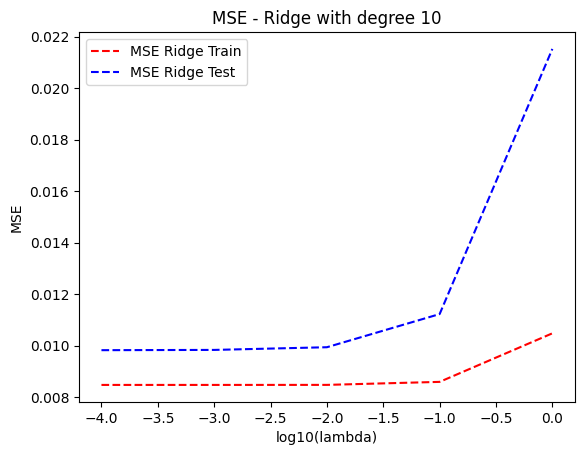

In [340]:
plt.figure()
plt.title("MSE - Ridge with degree 10")
plt.plot(np.log10(lambdas), MSEtraining, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(lambdas), MSEtest, 'b--', label = 'MSE Ridge Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()

Repeat with degree 15.

In [341]:
X = create_design_matrix(15)
# Split data set in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [342]:
# Scale the data
X_train_mean = np.mean(X_train,axis=0)

X_train_scaled = X_train - X_train_mean 
X_test_scaled = X_test - X_train_mean

y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler 

In [343]:
model = make_pipeline(PolynomialFeatures(degree = degree), LinearRegression(fit_intercept = False))
clf = model.fit(X_train_scaled, y_train_scaled)
y_fit = clf.predict(X_train_scaled)
y_pred = clf.predict(X_test_scaled)
test_mse = MSE(y_test, y_pred)
train_mse = MSE(y_train, y_fit)

print("Training MSE for OLS:")
print(train_mse)
print("Test MSE for OLS:")
print(test_mse)

In [314]:
I = np.eye(16,16)
lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
MSEPredict = np.zeros(len(lambdas))
for i in range(len(lambdas)):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X_train_scaled.T @ X_train_scaled + lmb*I) @ X_train_scaled.T @ y_train_scaled
    intercept_ = y_scaler - X_train_mean @ Ridgebeta
    # Make the prediction
    ytildeRidge = X_train_scaled @ Ridgebeta + y_scaler
    ypredictRidge = X_test_scaled @ Ridgebeta + y_scaler
    MSEtraining[i] = MSE(y_train, ytildeRidge)
    MSEtest[i] = MSE(y_test, ypredictRidge)

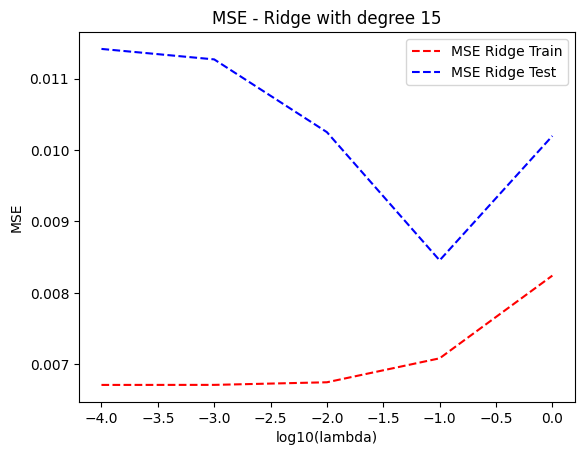

In [315]:
plt.figure()
plt.title("MSE - Ridge with degree 15")
plt.plot(np.log10(lambdas), MSEtraining, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(lambdas), MSEtest, 'b--', label = 'MSE Ridge Test')
plt.xlabel('log10(lambda)')
plt.ylabel('MSE')
plt.legend()
plt.show()